In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics.SIRModel as sir
import ndlib.models.epidemics as ep
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
from ndlib.viz.bokeh.MultiPlot import MultiPlot
import random

### Defining functions for visualization.

In [2]:

def plot_Centrality_statistics(G):
    
    """
    Function to plot the Centrality statistics.
    
    """
    
    # Calculate different centrality measures
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter = 1000)

    # Calculate average centrality values
    average_degree = sum(degree_centrality.values()) / len(degree_centrality)
    average_betweenness = sum(betweenness_centrality.values()) / len(betweenness_centrality)
    average_closeness = sum(closeness_centrality.values()) / len(closeness_centrality)
    average_eigenvector = sum(eigenvector_centrality.values()) / len(eigenvector_centrality)

    # Create subplots for the histograms
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(15, 4))

    # Create histograms for degree centrality
    ax1.hist(degree_centrality.values(), label='Degree Centrality')
    ax1.axvline(average_degree, color='r', linestyle='dashed', label='Average Degree Centrality')
    ax1.set_xlabel('Centrality Value')
    ax1.set_ylabel('Number of nodes')
    ax1.set_title('Degree Centrality')
    ax1.legend()

    # Create histograms for betweenness centrality
    ax2.hist(betweenness_centrality.values(), label='Betweenness Centrality')
    ax2.axvline(average_betweenness, color='r', linestyle='dashed', label='Average Betweenness Centrality')
    ax2.set_xlabel('Centrality Value')
    ax2.set_ylabel('Number of nodes')
    ax2.set_title('Betweenness Centrality')
    ax2.legend()

    # Create histograms for closeness centrality
    ax3.hist(closeness_centrality.values(), label='Closeness Centrality')
    ax3.axvline(average_closeness, color='r', linestyle='dashed', label='Average Closeness Centrality')
    ax3.set_xlabel('Centrality Value')
    ax3.set_ylabel('Number of nodes')
    ax3.set_title('Closeness Centrality')
    ax3.legend()

    # Create histograms for eigenvalue centrality
    ax4.hist(eigenvector_centrality.values(), label='Eigenvalue Centrality')
    ax4.axvline(average_eigenvector, color='r', linestyle='dashed', label='Average Eigenvalue Centrality')
    ax4.set_xlabel('Centrality Value')
    ax4.set_ylabel('Number of nodes')
    ax4.set_title('Eigenvalue Centrality')
    ax4.legend()


    fig.suptitle(f'Centrality Statistics for {network_type} with {num_nodes} nodes',fontsize=15)
    plt.tight_layout()
    plt.subplots_adjust(top=0.8, bottom=0.15) 
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.show()


### SIR on Renyi, Barabasi Albert, and Watts stogratz graphs network 

<class 'networkx.classes.reportviews.DegreeView'>


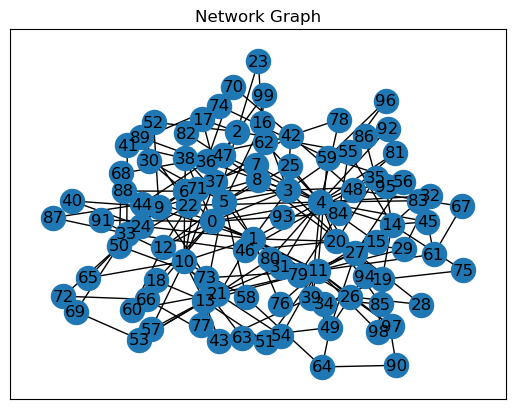

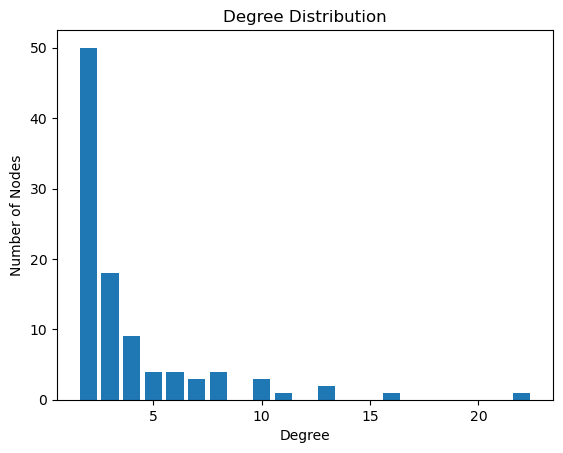

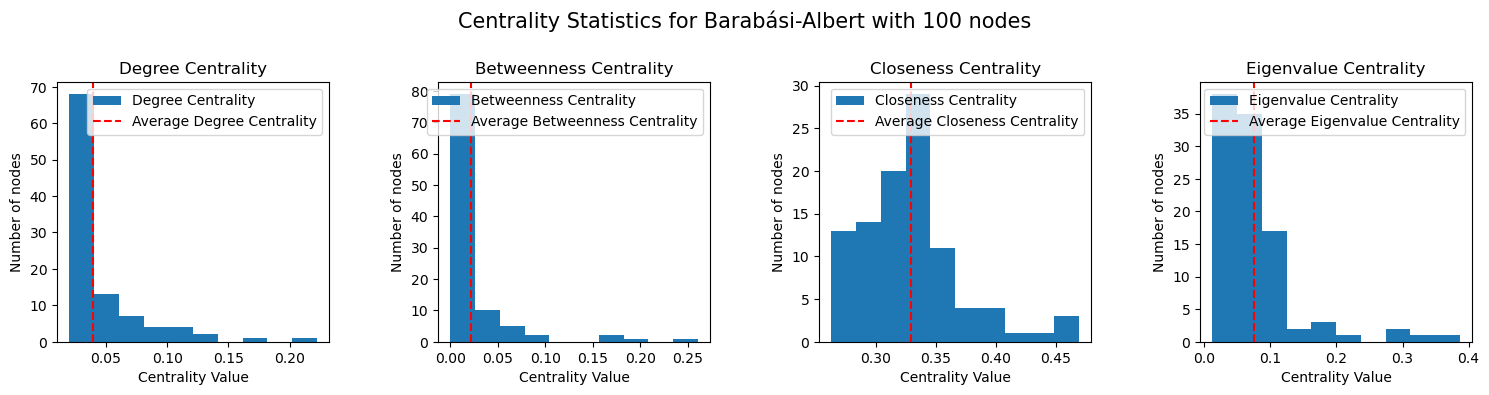

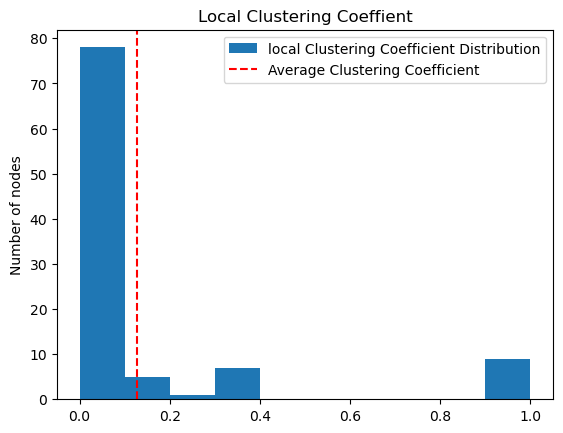

In [6]:
# ==============================================================
# Create a Watts-Strogatz small-world network
# num_nodes = 89
# k = 4  # Each node is connected to k nearest neighbors
# p = 0.1  # Probability of rewiring each edge
# G = nx.watts_strogatz_graph(num_nodes, k, p)
# # ==============================================================

# ==============================================================
# Create a Barabási-Albert scale-free network
num_nodes = 100
m = 2  # Number of edges to attach from a new node to existing nodes
G = nx.barabasi_albert_graph(num_nodes, m)
network_type = 'Barabási-Albert'
# ==============================================================

# ==============================================================
# Create an Erdős-Rényi random graph
# num_nodes = 100
# p = 0.1  # Probability of an edge between any pair of nodes
# G = nx.erdos_renyi_graph(num_nodes, p)
# ==============================================================

# Calculate and print degree distribution
print(type(G.degree()))
degree_sequence = [d for n, d in G.degree()]
degree_counts = dict(zip(*np.unique(degree_sequence, return_counts=True)))

# Visualization: Network graph (for small networks)
if num_nodes <= 100:
    pos = nx.spring_layout(G)
    nx.draw_networkx(G, pos, with_labels=True)
    plt.title("Network Graph")
    plt.show()
    
# Visualization: Degree distribution
plt.bar(degree_counts.keys(), degree_counts.values())
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution")
plt.show()

plot_Centrality_statistics(G)

local_clustering_coefficient = nx.algorithms.cluster.clustering(G)
av_local_clustering_coefficient = sum(local_clustering_coefficient.values()) / len(local_clustering_coefficient)
plt.hist(local_clustering_coefficient.values(), label = 'local Clustering Coefficient Distribution')
plt.axvline(av_local_clustering_coefficient, color = 'r', linestyle = 'dashed', label = 'Average Clustering Coefficient')
plt.legend()
plt.ylabel('Number of nodes')
plt.title('Local Clustering Coeffient')
plt.show()

# Initialize the SIR model
model = sir(G)

# Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.03)  # Transmission rate
config.add_model_parameter('gamma', 0.01)  # Recovery rate
config.add_model_parameter("fraction_infected", 5/num_nodes)  # Initial fraction of infected nodes
model.set_initial_status(config)

# Simulation
iterations = model.iteration_bunch(200)  # Number of iterations
iterations2 = model.iteration_bunch(100)

# Implement a vaccination strategy


# Random Vaccination startegy.
# ============================================================================================
# vaccination_probability = 0.1  # Probability of vaccinating a node

# for i in range(num_nodes):
#     if random.random() < vaccination_probability:
#         model.status[i] = 2  # Mark node as "removed" (vaccinated)

# Vaccination strategy.
# ============================================================================================

# Get the results
trends = model.build_trends(iterations)

# # Plot the results
viz = DiffusionTrend(model, trends)
p = viz.plot()
show(p)

trends = model.build_trends(iterations2)

# # Plot the results
viz = DiffusionTrend(model, trends)
p = viz.plot()
show(p)

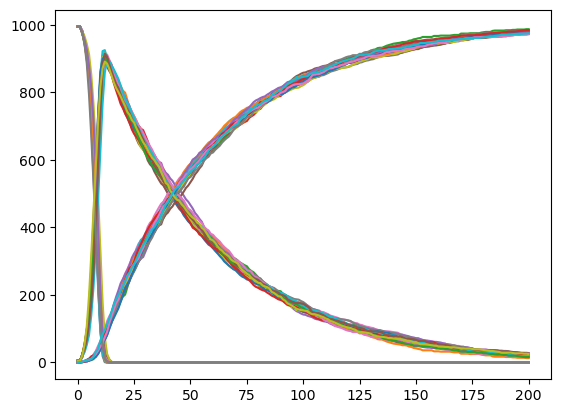

In [4]:
# Step 1: Create a network (you can replace this with your network creation code)
num_nodes = 1000
k = 4  # Each node is connected to k nearest neighbors
p = 0.1  # Probability of rewiring each edge
G = nx.watts_strogatz_graph(num_nodes, k, p)

# Step 2: Model Configuration
config = mc.Configuration()
config.add_model_parameter('beta', 0.76 )  # Transmission rate
config.add_model_parameter('gamma', 0.02)  # Recovery rate
config.add_model_parameter("fraction_infected", 5/num_nodes)  # Initial fraction of infected nodes



# Step 3: Simulate the SIR model with vaccination at every iteration
n_dimmensions = len(['Suceptible:0', 'Infected:1','Removed:2' ])
simulations = 20
iterations = 200
vaccination_probability = 0.84 # Probability of vaccine success
vaccination_budget = 1
testing_accuracy = 0.5

SIR_array = np.zeros((n_dimmensions, iterations + 1, simulations))

for n_simulation in range(simulations):
    
    # generating the network 
    model = sir(G)
    model.set_initial_status(config)
    
    vaccinated_nodes, infected_nodes, removed_nodes = [], [], []
    
    tests_remaining = 200
    
    # store initial status of nodes
    out = dict(zip(*np.unique(list(model.status.values()), return_counts=True)))
    SIR = np.array([(out[0] if 0 in out else 0),(out[1] if 1 in out else 0),(out[2] if 2 in out else 0)])
    SIR_array[:,0,n_simulation] = SIR.T
    
    for n_iteration in range(1, iterations + 1):
        # Run iteration
        model.iteration()
        
        # Test and Vaccinate nodes at each iteration
        node_array = list(G.nodes())
        untested_nodes = [node for node in node_array if node not in vaccinated_nodes + infected_nodes + removed_nodes]
        # untested nodes array can be modified according to centrality.
        num_samples = (vaccination_budget if len(untested_nodes) > vaccination_budget else len(untested_nodes))
        tests_iteration = 30
        sample_num = 0
        test_num = 0
        while sample_num < num_samples and (test_num < tests_iteration and tests_remaining > 0) :
            # Performing the test
            node = random.sample(untested_nodes, 1)[0] # random selection of nodes
            untested_nodes.remove(node)
            test_num += 1
            tests_remaining -= 1
            if (((model.status[node] == 0) | (model.status[node] == 2)) | ((model.status[node]) == 1 & (random.random() > testing_accuracy))):
                # Vaccinate if node is suspectible or test failed for infected
                # assuming vaccination doesn't work on infected
                model.status[node] = (2 if (model.status[node] != 1 and random.random() < vaccination_probability) else model.status[node]) 
                vaccinated_nodes.append(node)
                sample_num += 1
            else:
                infected_nodes.append(node)
        
        # storing data for plotting
        out = dict(zip(*np.unique(list(model.status.values()), return_counts=True)))
        SIR = np.array([(out[0] if 0 in out else 0),(out[1] if 1 in out else 0),(out[2] if 2 in out else 0)])
        SIR_array[:,n_iteration,n_simulation] = SIR.T

for n_simulation in range(simulations):
    plt.plot(SIR_array[0,:,n_simulation])
    plt.plot(SIR_array[1,:,n_simulation])
    plt.plot(SIR_array[2,:,n_simulation])
    

# Step 4: Get the results after the complete simulation
# model = sir(G)
# model.set_initial_status(config)
# trends = model.build_trends(model.iteration_bunch(iterations))

# Plot the results
# viz = DiffusionTrend(model, trends)
# p = viz.plot()
# show(p)
